# Diagrama do modelo eletrodinâmico do circuito

<img src="circuito.png" alt="Diagrama do circuito" style="height: 100px; width:100px;"/>

##Setups

## Importações

In [55]:
from cmath import *
from math import sqrt, pow, pi
import numpy as np
import matplotlib.pyplot as plt

## Funções

A função `CalculaTransformador` recebe os parâmetros do circuito e nos retornas as correntes no transformador primário e no secundário

In [56]:
def CalcularTransformador(Uf, Rc, k, f, R1, L1, C1, p):
  # Tensão da fonte (pico) = Uf   # Coeficiente de acoplamento = k
   # Indutâncias
    L2 = L1

    #Resistências
    R2 = R1

    # Cacitâncias
    C2 = C1

    # Freqncia
    #f

    # Frequêna angular
    w = 2*pi*f
  
    # Ressonancia 
    wr = 1/sqrt(L1*C1)
  
    # Indutancia    
    M = k * sqrt(L1*L2)
    
   # Reatâncias dormador
    XL1 = 1j*w*L1
    XL2 = 1j*w*L2
    
    XC1 = 1/(1j*w*C1)
    XC2 = 1/(1j*w*C2)
    
    XM = 1j*w*M

    M = k * sqrt(L1*L1)
    w = 2*pi*f
    XL = 1j*w*L1


    
    if p:    
      # Reatâncias da Indutância mútua
      print(f"A Indutäncia Mútua M:{M} Henry")
      print(f"A frequência de ressonancia Wr é: {wr/(2*pi)} Hz")
      print(f"A frequência angular W é: {w} Rad/s")
      print(f"Reatancia do indutor: {XL1}")
      print(f"Reatancia do capacitor: {XC1}")
      print(f"Reatancia dos transformadores: {XM}")
      print(f"-"*30)

    # Impedância Equivalente
    Z = np.array([[XC1 + R1 + XL1, -XM], [-XM, XL1 + R2 + ( (XC1 * Rc)/(XC1 + Rc) ) ]])
    # Tensão em forma fasorial
    V = np.array([Uf, 0])
    # i trata-se de uma tupla com os valores fasorias de i1 e i2
    i = np.dot(np.linalg.inv(Z),V)

    #tensao no secundario
    Zeq = ( (XC1 * Rc)/(XC1 + Rc) )
    v2 = Zeq * i[1]
    
    return i[0], i[1], v2


## Declarações das variáveis

In [57]:

# Entradas da função: Uf(volts), Rc(ohms), k, R1(ohms), L1(Henry), C1(Henry)
Uf = 5     # Tensão da fonte (pico)
Rc = 400      # Resistência do capacitor
k = 0.1     # Coeficiente de acoplamento
f = 35588      # frequencia da fonte
R1 = 0.5    # Resistência do resistor
L1 = 200e-6 # Indutância do indutor1
# L2 = L1     # Indutância do indutor2
C1 = 1e-7   # Capacitância dos capacitores

# Cálculos

## Cálculo de $I_1$ e $I_2$

In [58]:
i1, i2, v2 = CalcularTransformador(Uf, Rc, k, f, R1, L1, C1, True)
print(f"i1: {i1}")
print(f"i2: {i2}")

A Indutäncia Mútua M:2e-05 Henry
A frequência de ressonancia Wr é: 35588.127170858854 Hz
A frequência angular W é: 223605.9987119071 Rad/s
Reatancia do indutor: 44.72119974238142j
Reatancia do capacitor: -44.72151935818123j
Reatancia dos transformadores: 4.472119974238143j
------------------------------
i1: (1.198144235413883+0.1069810534743938j)
i2: (0.01187525853846398+0.9840732616319872j)


## Cálculos Adicionais

Cálculo de:
- Tensão $V_2$ (Tensão de Saída)
- Correntes e tensões de pico
- Relação $\frac{V_1}{V_2}$
- Potências

In [59]:
# ------------------------------ Tensão de Saída ----------------------------- #
print('Com resistor na saída de %.2f Ω:' %Rc)
print('i1 (pico) = %.3f A' %np.abs(i1))
print('i2 (pico) = %.3f A' %np.abs(i2))
print('V1 (pico) = %.3f V' %Uf)
print('V2 (pico) = %.8f V' %(np.abs(v2)))
print('Relação V1/V2 = %.8f' %(np.abs(Uf/(v2))))



Com resistor na saída de 400.00 Ω:
i1 (pico) = 1.203 A
i2 (pico) = 0.984 A
V1 (pico) = 5.000 V
V2 (pico) = 43.73992820 V
Relação V1/V2 = 0.11431203


# Gráficos

## Gráfico de $I_1$ e $I_2$ em função da frequência 

modulos das correntes em funcão da frequência da fonte de um k = 0.1


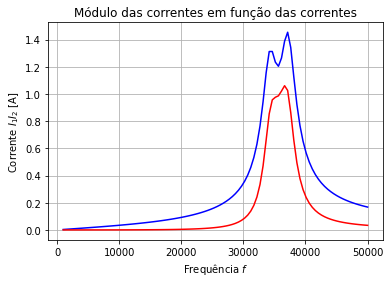

Corrente máxima I1 = 1.4541338794084544 para uma frequencia de 37131.31313131313
------------------------------
Corrente máxima I2 = 1.0608537440197965 para uma frequencia de 36636.36363636364


In [60]:
#Construção de gráficos de I1 e I2 em função da frequência:
#Frequencia que vai de 10hz - 100khz
F = np.linspace(1000,50000,100)
I1 = []
I2 = []
print("modulos das correntes em funcão da frequência da fonte de um k = {}".format(k))

#Uf, Rc, k, f, R1, L1, C1, p
max_i1 = 0
max_i2 = 0

for f in F:
    i1, i2, v2 = CalcularTransformador(Uf, Rc, k, f, R1, L1, C1, False)
    mod_i1 = abs(i1)
    mod_i2 = abs(i2)

    I1.append(mod_i1)
    I2.append(mod_i2)

    if mod_i1 > max_i1:
        max_i1 = mod_i1
        f_max_i1 = f

    if mod_i2 > max_i2:
        max_i2 = mod_i2
        f_max_i2 = f


plt.plot(F, I1, label = "corrente I1", color = "b")
plt.plot(F, I2, label = "corrente I2", color = "r")
plt.title("Módulo das correntes em função das correntes")
plt.xlabel("Frequência $f$")
plt.ylabel("Corrente $I_1 I_2$ [A]")
plt.grid(True)
plt.show()

print("Corrente máxima I1 = {} Ohms para uma frequencia de {}".format(max_i1, f_max_i1))
print("-"*30)
print("Corrente máxima I2 = {} Ohms para uma frequencia de {}".format(max_i2, f_max_i2))

## Gráfico de Potência e Eficiência em função da frequência

modulos das correntes em funcão da frequência da fonte de um k = 0.1


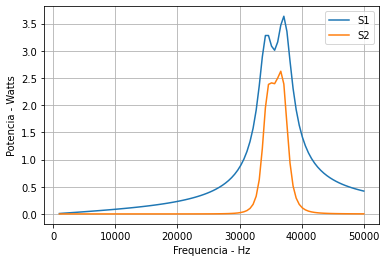

Potencia máxima S1 = (3.386904077471262+0.7554133238584533j) Hz para uma frequencia de 36636.36363636364
------------------------------
Potencia máxima S2 = (2.623880670126884+0j) Watts para uma frequencia de 36636.36363636364


In [61]:
#Construção de gráficos das potências e da eficiência em função da frequência:

# Criando um vetor para variar a frequência de 10hz - 100khz
F = np.linspace(1000,50000,100)
L_s1 = [] 
L_s2 = [] 
print("modulos das correntes em funcão da frequência da fonte de um k = {}".format(k))

max_s1 = 0
max_s2 = 0

f_max_s1 = 0
f_max_s2 = 0


for f in F:
    i1, i2, v2 = CalcularTransformador(Uf, Rc, k, f, R1, L1, C1, False)

    i_rc =  v2/Rc

    # Potências:
    S1 = Uf * i1.conjugate()/2
    # print('Potência real = %.2f' %(S1.real))

    S2 = v2 * i_rc.conjugate()/2
    # print('Potência real = %.2f' %(S2.real))

    
    if S1 > max_s1:
        max_s1 = S1
        f_max_s1 = f

    if S2 > max_s2:
        max_s2 = S2
        f_max_s2 = f

    L_s1.append(abs(S1))
    L_s2.append(abs(S2))

plt.plot(F, L_s1, label = "S1")
plt.legend()

plt.plot(F, L_s2, label = "S2")
plt.legend()

plt.xlabel("Frequencia - Hz")
plt.ylabel("Potencia - Watts")

plt.grid(True)
plt.show()


print("Potencia máxima S1 = {} Hz para uma frequencia de {}".format(max_s1, f_max_s1))
print("-"*30)
print("Potencia máxima S2 = {} Watts para uma frequencia de {}".format(max_s2, f_max_s2))

## Gráfico da Tensão de Pico no Secundário em Função do Coeficiente de Acoplamento

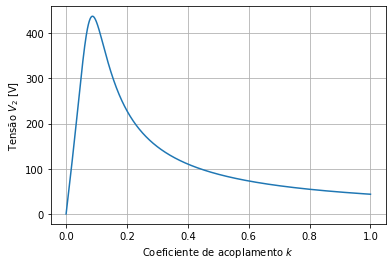

In [62]:
#Construção de um gráfico que relacione o valor de pico da tensão no secundário (no resistor RC) com o coeficiente de acoplamento
K=np.linspace(0,1,1000)
V2=[]
f = 36636 # Frequencia fixa, usamos a de pico 
w = 2 * pi * f


for k in K:
    m = k*sqrt(L1*L1)
    xm = 1j*w*m
    i1, i2, v2 = CalcularTransformador(Uf, Rc, k, f, R1, L1, C1, False)
    V2.append(abs(Rc*i2))
    
plt.plot(K,V2)
plt.xlabel("Coeficiente de acoplamento $k$")
plt.ylabel("Tensão $V_2$ [V]")
plt.grid(True)
plt.show()